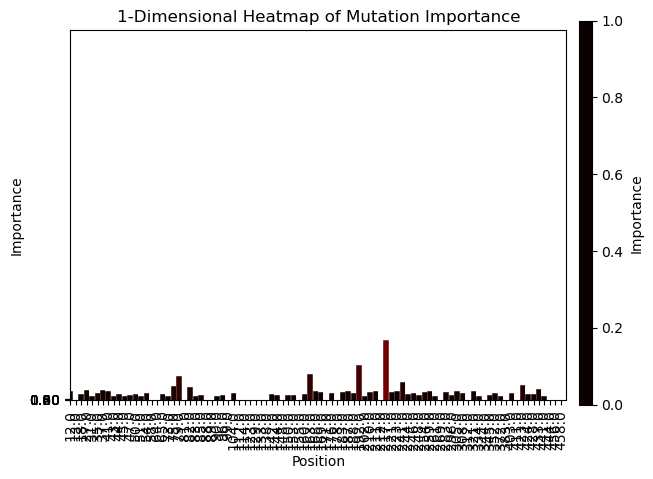

In [45]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

#import data from output of regression model 
data = pd.read_csv('Mutation_loc_importance.csv')

#datas = pd.DataFrame({'position':position, 'importance':importance})
#datas.head(5)

#ploting data on a heatmap
cmap = plt.get_cmap('hot')
fig, ax = plt.subplots()
    
        
# Iterate over the values of the dataframe
for i, row in data.iterrows():
    for j, value in enumerate(row):
        ax.axvline(x=i, ymin=0, ymax=value, color=cmap(value), linewidth=4)
    
ax.set_xlim(0, len(data))

# Scale the y-axis based on data values
y_min = data.min().min()
y_max = data.max().max()
ax.set_ylim(y_min, y_max)


# Add axis labels
ax.set_xlabel('Position')
ax.set_ylabel('Importance')


# Set custom tick labels for x-axis and y-axis
ax.set_xticks(np.arange(len(data['Locations'])))
ax.set_xticklabels(data['Locations'], rotation=90)  # Assuming row names represent positions

# Set y-axis tick labels as decimals
ax.set_yticks(np.linspace(0, 1, num=6))
ax.set_yticklabels(['{:.2f}'.format(i) for i in np.linspace(0, 1, num=6)])


# Add title
ax.set_title('1-Dimensional Heatmap of Mutation Importance')

# Create a colorbar
norm = Normalize(vmin=data.min().min(), vmax=data.max().max())
cbar = ColorbarBase(ax=fig.add_axes([0.92, 0.1, 0.02, 0.8]), cmap=cmap, norm=norm)
cbar.set_label('Importance')


ax.axis('on')

plt.ylim(0,1)
plt.show()
